# Noise model diagnostics: autocorrelation of the residuals

This example shows how to use the autocorrelation plots of the residuals to check assumptions of the noise model.

Three cases are shown. In the first two, optimisation is used to obtain a best-fit parameter vector in a single output problem. In the first case the noise is correctly specified and in the second case the noise is misspecified. The third case demonstrates the same method in a multiple output problem with Bayesian inference.

## Case 1: Correctly specified noise

For the first example, we will use optimisation to obtain the best-fit parameter vector. See [Optimisation First Example](../../optimisation/first-example.ipynb) for more details. We begin with a problem in which the noise is correctly specified: both the data generation and the model use independent Gaussian noise.

In [1]:
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

# Use the toy logistic model
model = toy.LogisticModel()

real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 100)
org_values = model.simulate(real_parameters, times)

# Add independent Gaussian noise
noise = 50
values = org_values + np.random.normal(0, noise, org_values.shape)

# Set up the problem and run the optimisation 
problem = pints.SingleOutputProblem(model, times, values)

score = pints.SumOfSquaresError(problem)
boundaries = pints.RectangularBoundaries([0, 200], [1, 1000])
x0 = np.array([0.5, 500])

found_parameters, found_value = pints.optimise(
    score,
    x0,
    boundaries=boundaries,
    method=pints.XNES,
    )

print('Score at true solution: ')
print(score(real_parameters))

print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

Minimising error measure
Using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Time m:s
0     6      3592175    0:00.0
1     12     3592175    0:00.0
2     18     3592175    0:00.0
3     24     3192679    0:00.0
20    126    1669396    0:00.0
40    246    1669396    0:00.1
60    366    1573906    0:00.1
80    486    1573906    0:00.1
100   606    1562937    0:00.1
120   726    1528234    0:00.2
140   846    426052     0:00.2
160   966    205168.8   0:00.2
180   1086   205153.4   0:00.2
200   1206   205153.3   0:00.2
220   1326   205153.3   0:00.3
240   1446   205153.3   0:00.3
260   1566   205153.3   0:00.3
280   1686   205153.3   0:00.4
300   1806   205153.3   0:00.4
320   1926   205153.3   0:00.4
340   2046   205153.3   0:00.4
360   2166   205153.3   0:00.5
380   2286   205153.3   0:00.5
400   2406   205153.3   0:00.5
420   2526   205153.3   0:00.6
440   2646   205153.3   0:00.6
460   2766   205153.3   0:00.6
480   28

### Visualisation of the data
After obtaining these parameters, it is useful to visualise the data and the fit.

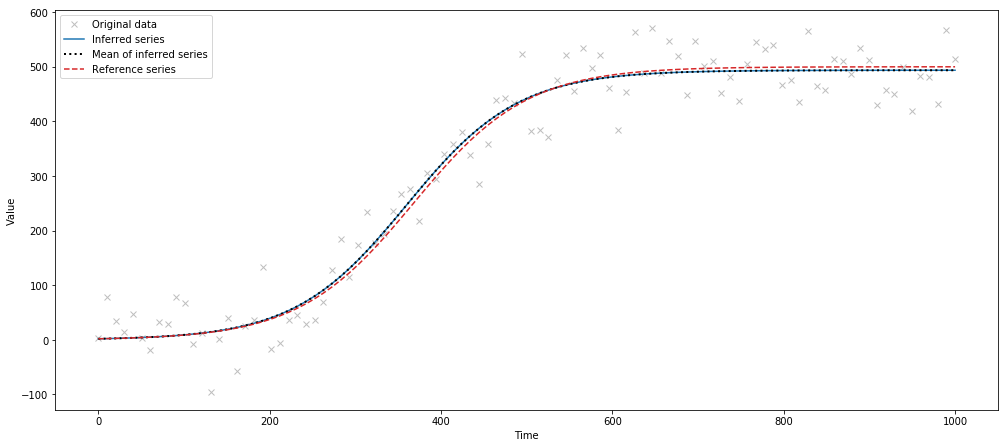

In [2]:
fig, ax = pints.plot.series(np.array([found_parameters]), problem, ref_parameters=real_parameters)
fig.set_size_inches(15, 7.5)
plt.show()

### Plotting autocorrelation of the residuals
Next we look at the autocorrelation plot of the residuals to evaluate the noise model (using [pints.residuals_diagnostics.plot_residuals_autocorrelation](https://pints.readthedocs.io/en/latest/noise_model_diagnostics.html#pints.residuals_diagnostics.plot_residuals_autocorrelation)).

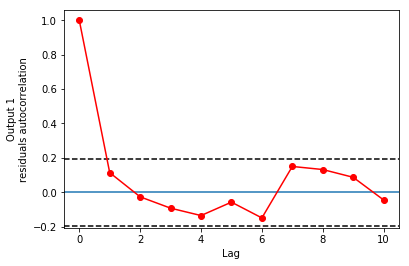

In [3]:
from pints.residuals_diagnostics import plot_residuals_autocorrelation

# Plot the autocorrelation
fig = plot_residuals_autocorrelation(np.array([found_parameters]),
                                     problem)

plt.show()


The figure shows no significant autocorrelation in the residuals. Therefore, the assumption of independent noise may be valid.

## Case 2: Incorrectly specified noise

For the next case, we generate data with an AR(1) (first order autoregressive) noise model. However, we deliberately misspecify the model and assume independent Gaussian noise (as before) when fitting the parameters.

In [4]:
import pints.noise

# Use the toy logistic model
model = toy.LogisticModel()

real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 100)
org_values = model.simulate(real_parameters, times)

# Add AR(1) noise
rho = 0.75
sigma = 50
values = org_values + pints.noise.ar1(rho, sigma, len(org_values))

# Set up the problem and run the optimisation 
problem = pints.SingleOutputProblem(model, times, values)

score = pints.SumOfSquaresError(problem)
boundaries = pints.RectangularBoundaries([0, 200], [1, 1000])
x0 = np.array([0.5, 500])

found_parameters, found_value = pints.optimise(
    score,
    x0,
    boundaries=boundaries,
    method=pints.XNES,
    )

print('Score at true solution: ')
print(score(real_parameters))

print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

Minimising error measure
Using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Time m:s
0     6      4614801    0:00.0
1     12     4423622    0:00.0
2     18     4375400    0:00.0
3     24     3546864    0:00.0
20    126    514928.2   0:00.1
40    246    514928.2   0:00.1
60    366    293485.8   0:00.1
80    486    290205     0:00.1
100   606    290203.6   0:00.1
120   726    290203.6   0:00.2
140   846    290203.6   0:00.2
160   966    290203.6   0:00.2
180   1086   290203.6   0:00.3
200   1206   290203.6   0:00.3
220   1326   290203.6   0:00.3
240   1446   290203.6   0:00.3
260   1566   290203.6   0:00.3
280   1686   290203.6   0:00.4
300   1806   290203.6   0:00.4
320   1926   290203.6   0:00.4
340   2046   290203.6   0:00.4
360   2166   290203.6   0:00.5
380   2286   290203.6   0:00.5
400   2406   290203.6   0:00.6
406   2436   290203.6   0:00.6
Halting: No significant change for 200 iterations.
Score at true solut

### Visualisation of the data
As before we plot the data and the inferred trajectory.

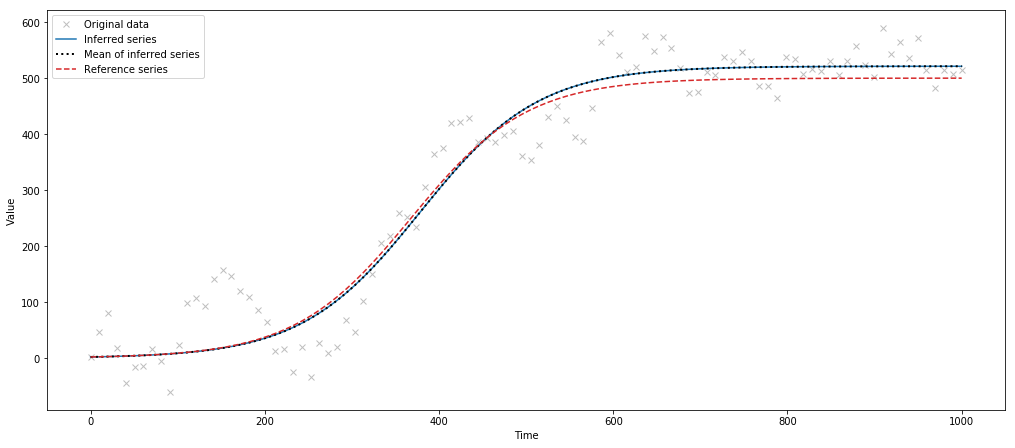

In [5]:
fig, ax = pints.plot.series(np.array([found_parameters]), problem, ref_parameters=real_parameters)
fig.set_size_inches(15, 7.5)
plt.show()

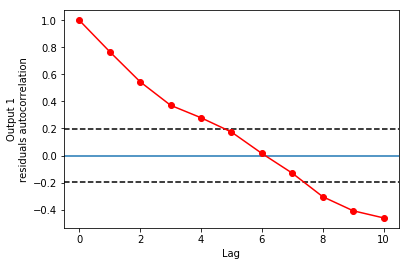

In [6]:
# Plot the autocorrelation
fig = plot_residuals_autocorrelation(np.array([found_parameters]),
                                     problem)

plt.show()

Now the autocorrelation plot of the residuals shows high autocorrelation at small lags, which is typical of AR(1) noise. Therefore, this visualisation suggests that the assumption of independent Gaussian noise which we made during inference is invalid.

## Case 3: Multiple output Bayesian inference problem 

The `plot_residuals_autocorrelation` function also works with Bayesian inference and multiple output problems. For the final example, we demonstrate the same strategy in this setting.

For this example, the Lotka-Volterra model is used. See the [Lotka-Volterra example](../toy/model-lotka-volterra.ipynb) for more details. As in Case 1, the true data is generated with independent Gaussian noise.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pints
import pints.toy

model = pints.toy.LotkaVolterraModel()

times = np.linspace(0, 3, 50)
parameters = model.suggested_parameters()
model.set_initial_conditions([2, 2])
org_values = model.simulate(parameters, times)

# Add noise
sigma = 0.1
values = org_values + np.random.normal(0, sigma, org_values.shape)

# Create an object with links to the model and time series
problem = pints.MultiOutputProblem(model, times, values)

# Create a log posterior
log_prior = pints.UniformLogPrior([0, 0, 0, 0, 0, 0], [6, 6, 6, 6, 1, 1])
log_likelihood = pints.GaussianLogLikelihood(problem)
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

# Run MCMC on the noisy data
x0 = [[4, 1, 2, 3, .1, .1]]*3
mcmc = pints.MCMCController(log_posterior, 3, x0)
mcmc.set_max_iterations(4000)

print('Running')
chains = mcmc.run()
print('Done!')

Running
Using Haario-Bardenet adaptive covariance MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.0
1     6      0         0.5       0.5        0:00.0
2     9      0         0.333     0.667      0:00.0
3     12     0         0.25      0.75       0:00.1
20    63     0.524     0.333     0.476      0:00.2
40    123    0.439     0.463     0.366      0:00.4
60    183    0.459     0.475     0.344      0:00.5
80    243    0.457     0.42      0.308642   0:00.6
100   303    0.475     0.386     0.317      0:00.8
120   363    0.463     0.331     0.273      0:00.9
140   423    0.426     0.312     0.248227   0:01.1
160   483    0.391     0.292     0.224      0:01.2
180   543    0.365     0.276     0.204      0:01.4
Initial phase completed.
200   603    0.348     0.259     0.184      0:01.5
220   663    0.353     0.271     0.176      0:01.6
240   723    0.369     0.303     0.203      0:01.7
260 

3140  9423   0.205     0.214263  0.22       0:15.4
3160  9483   0.207     0.215     0.22       0:15.5
3180  9543   0.207     0.216     0.221      0:15.6
3200  9603   0.207     0.216     0.221      0:15.7
3220  9663   0.208     0.216     0.22       0:15.8
3240  9723   0.208     0.216     0.221      0:15.9
3260  9783   0.209445  0.215     0.221      0:16.0
3280  9843   0.209997  0.215     0.222      0:16.1
3300  9903   0.211     0.213     0.221751   0:16.1
3320  9963   0.212     0.213791  0.223      0:16.2
3340  10023  0.213     0.214     0.223      0:16.3
3360  10083  0.214     0.215     0.224      0:16.4
3380  10143  0.215     0.216     0.224194   0:16.5
3400  10203  0.216     0.216995  0.224      0:16.6
3420  10263  0.216     0.217188  0.223      0:16.7
3440  10323  0.217     0.217     0.222      0:16.8
3460  10383  0.217     0.217     0.222      0:16.9
3480  10443  0.217179  0.216     0.222      0:17.0
3500  10503  0.219     0.216     0.221651   0:17.0
3520  10563  0.22      0.217   

### Visualisation of the data
As before we plot the data and the inferred trajectories.

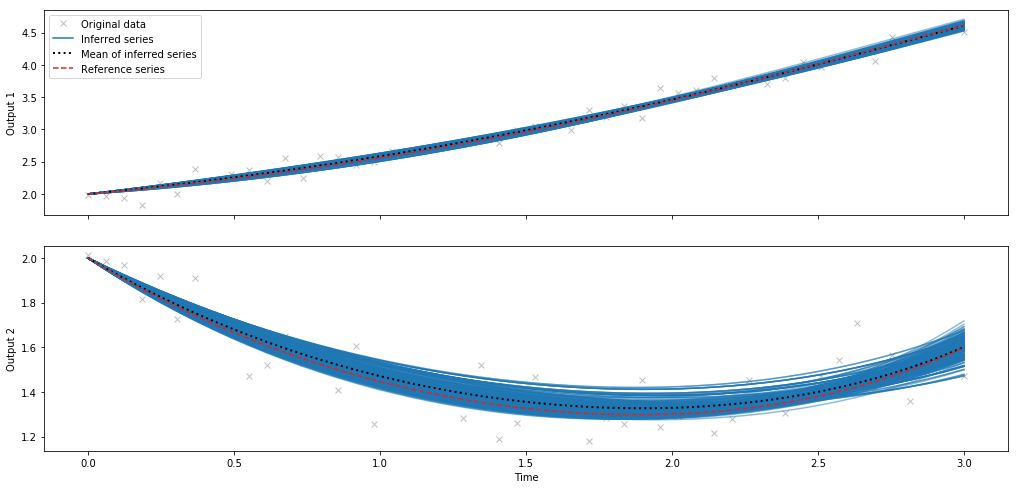

In [8]:
# Get the first MCMC chain
chain1 = chains[0]

# Cut off the burn-in samples
chain1 = chain1[2500:]

fig, ax = pints.plot.series(chain1, problem, ref_parameters=parameters)
fig.set_size_inches(15, 7.5)
plt.show()

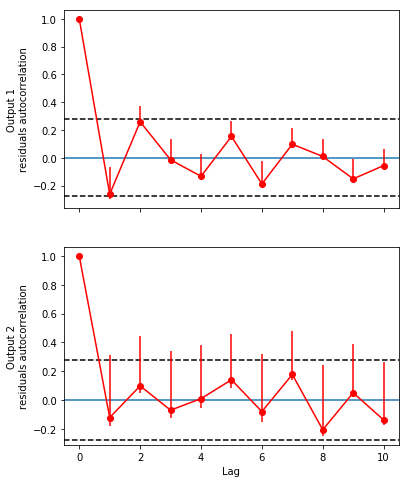

In [9]:
# Plot the autocorrelation
fig = plot_residuals_autocorrelation(chain1, problem)

plt.show()

The `plot_residuals_autocorrelation` function generates one residuals plot for each output. Additionally, since Bayesian inference was performed and an MCMC chain was provided to the function, it draws a diagram of the distribution of the autocorrelations at each lag over the MCMC samples. Each dot indicates the median autocorrelation, and the bars show the extent of the 95% posterior interval.

In both outputs, no significant autocorrelation in the residuals is seen, as expected since independent Gaussian noise was used to generate the data.